### Khushi      

T Test Analysis
1. One Sample T test.
2. 2 sample T test.
3. Paired T test.

In [31]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from scipy.stats import t
from scipy.stats import norm

In [14]:
data=pd.read_excel('Marvel-DC.xlsx')
data.tail()

,Company,Film,Release,Adjusted,Worldwide,Domestic,Foreign
59,DC,Steel,1997,2.539807,1.710972,1.710972,NaN
60,Marvel,The Punisher,1989,1.024880,0.533411,NaN,0.533411
61,DC,The Return of Swamp Thing,1989,0.370471,0.192816,0.192816,NaN
62,Marvel,Captain America,1990,0.018544,0.010173,NaN,0.010173
63,DC,Swamp Thing,1982,NaN,NaN,NaN,NaN


In [15]:
data['Worldwide']=data['Worldwide'].fillna(data['Worldwide'].mean())
data['Adjusted']=data['Adjusted'].fillna(data['Adjusted'].mean())
data['Adjusted'].isna().sum(),data['Worldwide'].isna().sum()

(0, 0)

In [16]:
def std_dev(data):
    mx=data.mean()
    sd=0
    for x in data:
        s=np.square(x-mx)
        sd+=s
    sd=sd/(data.shape[0]) #variance
    sd=np.sqrt(sd)
    return sd    


One Sample T Test

In [17]:
#One sample T Test

# For a lower-tailed test, p-value = cdf(ts)
# For an upper-tailed test, p-value = 1 - cdf(ts)
# For a two-tailed test, p-value = 2 * (1 - cdf(|ts|))

def TTest_1s(Sdata,mu,inbuilt=0,tail=1):
    if(inbuilt):
        alt='two-sided'if tail==1 else ('less' if tail<1 else 'greater')
        #alternative{‘two-sided’, ‘less’, ‘greater’}, optional
        return scipy.stats.ttest_1samp(Sdata,popmean=mu,alternative=alt)
    else:
        x= Sdata.mean()
        sd=std_dev(Sdata)
        T_stat=((x-mu)/sd)*np.sqrt(Sdata.shape[0]-1)
        if(tail<1):    #left Tail
            T_stat*=-1
            pval = t.cdf(np.abs(T_stat), Sdata.shape[0]-1)
        if(tail==1):   #2 Tailed
            pval = (1-t.cdf(np.abs(T_stat), Sdata.shape[0]-1))*2
        if(tail==2):
            pval = 1-t.cdf(np.abs(T_stat), Sdata.shape[0]-1)
            
        return T_stat,pval



In [18]:
print("With Inbuilt function:")
print(TTest_1s(data['Adjusted'],data['Worldwide'].mean(),1,0))
print("Without Inbuilt function:")
print(TTest_1s(data['Adjusted'],data['Worldwide'].mean(),0,0))

With Inbuilt function:
Ttest_1sampResult(statistic=1.4836866333720504, pvalue=0.9285609697033983)
Without Inbuilt function:
(-1.4836866333720506, 0.9285609697033984)


In [19]:
print("With Inbuilt function:")
print(TTest_1s(data['Adjusted'],data['Worldwide'].mean(),1,2))
print("Without Inbuilt function:")
print(TTest_1s(data['Adjusted'],data['Worldwide'].mean(),0,2))

With Inbuilt function:
Ttest_1sampResult(statistic=1.4836866333720504, pvalue=0.07143903029660167)
Without Inbuilt function:
(1.4836866333720506, 0.07143903029660159)


In [86]:
x1=np.arange(-1*data['Adjusted'].mean(),3*data['Adjusted'].mean(),0.01)
x2=np.arange(-1*data['Worldwide'].mean(),3*data['Worldwide'].mean(),0.01)

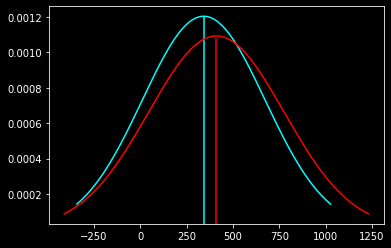

In [89]:
# x_axis = data['Adjusted']
# # fig=sns.lineplot(x_axis, norm.pdf(x_axis, data['Adjusted'].mean(), std_dev(data['Adjusted'])))
# # fig.set_xlim([-10,1000])
# # fig.set_ylim([0.0006,0.0012])
fig=sns.lineplot(x=x2, y=norm.pdf(x2,x2.mean(), std_dev(data['Worldwide'])),color="cyan")
fig.axvline(data['Worldwide'].mean(),color="cyan",ymax=0.95)
fig=sns.lineplot(x=x1, y=norm.pdf(x1,x1.mean(), std_dev(data['Adjusted'])),color="red")
fig.axvline(data['Adjusted'].mean(),color="red",ymax=0.85)

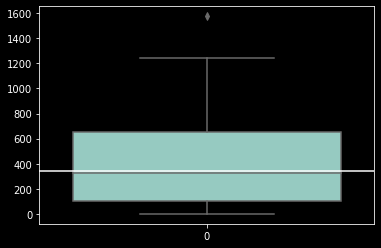

In [20]:
fig=sns.boxplot(data=data['Adjusted'])
fig.axhline(data['Worldwide'].mean())

2 Sample T Test

In [21]:
# 2 Sample T test

def std_dev_2s(Sdata1,Sdata2):
    s1=std_dev(Sdata1)
    s2=std_dev(Sdata2)
    n1=Sdata1.shape[0]
    n2=Sdata2.shape[0]
    SS=((n1-1)*np.square(s1))+((n2-1)*np.square(s2))
    SS/=n1+n2-2
    return np.sqrt(SS)

def TTest_2s(Sdata1,Sdata2,inbuilt=0,equalvar=1):
    if(inbuilt):
        return scipy.stats.ttest_ind(a=Sdata1, b=Sdata2, equal_var=bool(equalvar))
    else:
        x1= Sdata1.mean()
        x2= Sdata2.mean()
        n1=Sdata1.shape[0]
        n2=Sdata2.shape[0]
        if(equalvar):
            sd=std_dev_2s(Sdata1,Sdata2)
            T_stat=(x1-x2)/(sd*np.sqrt((1/(n1-1)+(1/(n2-1)))))
        else:
              s1=std_dev(Sdata1)
              s2=std_dev(Sdata2)
              T_stat=(x1-x2)/(np.sqrt((s1*s1/n1)+(s2*s2/n2)))
        pval = t.sf(np.abs(T_stat), n1+n2-2)*2   
        return T_stat,pval

In [22]:
data.groupby(by='Company')['Adjusted'].count()

Company
DC        27
Marvel    37
Name: Adjusted, dtype: int64

In [23]:

S1=data[data['Company']=='DC']['Adjusted']
S2=data[data['Company']=='Marvel']['Adjusted']

#assume equal variances of Samples
print("Assume equal variances of Samples","\n")
print("With Inbuilt Function : ")
print(TTest_2s(S1,S2,1))
print("Without Inbuilt Function : ")
print(TTest_2s(S1,S2,0),"\n")

#assume unequal variances of Samples
print("Assume unequal variances of Samples")
print("With Inbuilt Function : ")
print(TTest_2s(S1,S2,1,0))
print("Without Inbuilt Function : ")
print(TTest_2s(S1,S2,0,0))

Assume equal variances of Samples 

With Inbuilt Function : 
Ttest_indResult(statistic=-1.2140741313521333, pvalue=0.22932376267946378)
Without Inbuilt Function : 
(-1.212817856417504, 0.22980038663448218) 

Assume unequal variances of Samples
With Inbuilt Function : 
Ttest_indResult(statistic=-1.2298018513713647, pvalue=0.22368530627622976)
Without Inbuilt Function : 
(-1.2502306693893925, 0.21591359058912712)


<AxesSubplot:>

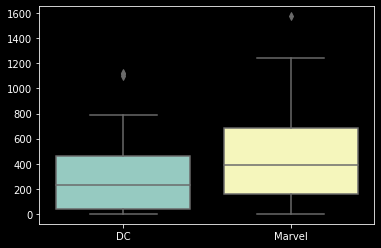

In [24]:
sns.boxplot(data=pd.DataFrame({'DC':S1,"Marvel":S2}))

Paired T Test

In [25]:
data['Domestic']=data['Domestic'].fillna(data['Domestic'].mean())
data['Foreign']=data['Foreign'].fillna(data['Foreign'].mean())
data['Foreign'].isna().sum(),data['Domestic'].isna().sum()

PairedSample=data['Foreign']-data['Domestic']
PairedSample.head()

0    271.879090
1    397.412006
2    188.160901
3    -65.158444
4     31.781982
dtype: float64

In [26]:
print("With Inbuilt Function : ")
print(TTest_1s(PairedSample,0,1))
print("Without Inbuilt Function : ")
print(TTest_1s(PairedSample,0))

With Inbuilt Function : 
Ttest_1sampResult(statistic=3.54334611838087, pvalue=0.0007504799064670227)
Without Inbuilt Function : 
(3.54334611838087, 0.0007504799064670387)


<AxesSubplot:>

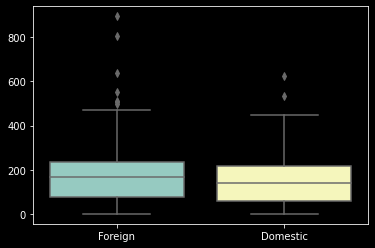

In [27]:
sns.boxplot(data=data[['Foreign','Domestic']])